In [166]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter
##
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [36]:
songs_df = pd.read_csv('spotify_songs.csv')

### Exploratory Data Analysis

In [37]:
songs_df.columns, songs_df.shape

(Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
        'track_album_id', 'track_album_name', 'track_album_release_date',
        'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
        'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
        'duration_ms', 'language'],
       dtype='object'),
 (18454, 25))

In [38]:
songs_df.head()

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,41,1srJQ0njEQgd8w4XSqI4JQ,Trip,2001-01-01,Pinoy Classic Rock,37i9dQZF1DWYDQ8wBxd7xt,...,-10.068,1,0.0236,0.27900,0.01170,0.0887,0.566,97.091,235440,tl
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,3z04Lb9Dsilqw68SHt6jLB,Love & Loss,2017-11-21,Hard Rock Workout,3YouF0u7waJnolytf9JCXf,...,-4.739,1,0.0442,0.01170,0.00994,0.3470,0.404,135.225,373512,en
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,6oZ6brjB8x3GoeSYdwJdPc,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",3a9y4eeCJRmG9p4YKfqYIx,...,-7.504,0,0.2160,0.00432,0.00723,0.4890,0.650,111.904,262467,en
3,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,3ssspRe42CXkhPxdc12xcp,CeeLo's Magic Moment,2012-10-29,Christmas Soul,6FZYc2BvF7tColxO8PBShV,...,-5.819,0,0.0341,0.68900,0.00000,0.0664,0.405,118.593,243067,en
4,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,7h5X3xhh3peIK9Y0qI5hbK,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,37i9dQZF1DX4RDXswvP6Mj,...,-1.993,1,0.0409,0.03700,0.00000,0.1380,0.240,130.018,193160,en


<Axes: >

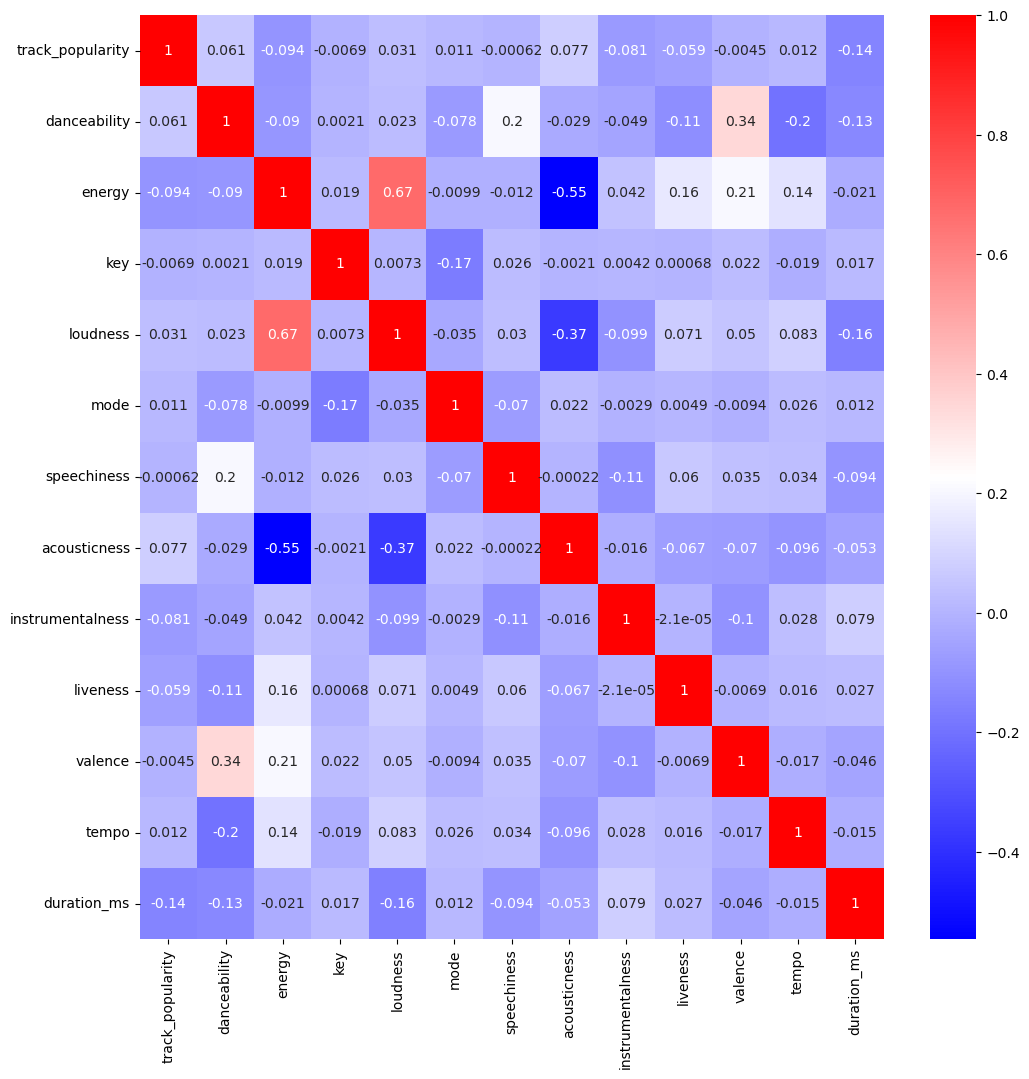

In [39]:
### examining collinearity - using a diverging color schema
plt.subplots(figsize=(12,12))
numerical_columns = ['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
        'duration_ms']
sns.heatmap(songs_df[numerical_columns].corr(), annot=True, cmap='bwr')

In [40]:
songs_df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000
mean,42.438821,0.644066,0.692289,5.342094,-6.769159,0.580525,0.106192,0.175348,0.051216,0.189593,0.520598,120.812167,230319.306763
std,24.616740,0.150071,0.180635,3.613121,2.920757,0.493487,0.102291,0.217795,0.168263,0.153751,0.228716,27.586424,57255.086685
min,0.000000,0.098500,0.016700,0.000000,-34.283000,0.000000,0.022400,0.000001,0.000000,0.009360,0.000010,37.114000,31893.000000
25%,24.000000,0.546000,0.573000,2.000000,-8.249000,0.000000,0.039700,0.016100,0.000000,0.092700,0.345000,98.856000,193230.250000
50%,48.000000,0.660000,0.715000,6.000000,-6.227000,1.000000,0.060300,0.081900,0.000009,0.128000,0.522000,120.045000,221340.000000
75%,62.000000,0.755000,0.835000,9.000000,-4.719000,1.000000,0.130000,0.254000,0.001720,0.246000,0.700000,135.984000,258078.250000
max,100.000000,0.979000,1.000000,11.000000,1.275000,1.000000,0.918000,0.992000,0.987000,0.996000,0.991000,214.047000,517810.000000


Although the 'energy' category, has some collinearity with loudness and accousticness, it is not above >0.7, so it will not be removed

### PCA

In [46]:
scaled_df = preprocessing.StandardScaler().fit_transform(songs_df[numerical_columns])
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = numerical_columns
#standardizing vector components

In [48]:
scaled_df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,1.845400e+04,1.845400e+04,1.845400e+04,1.845400e+04,1.845400e+04,1.845400e+04,1.845400e+04,1.845400e+04,1.845400e+04,1.845400e+04,1.845400e+04,1.845400e+04,1.845400e+04
mean,5.082456e-17,-1.185906e-16,2.521976e-17,6.738104e-17,-2.310207e-16,8.605522e-17,-1.293716e-16,1.001090e-17,4.716673e-17,-8.470760e-18,6.164403e-16,2.968616e-16,-7.854705e-17
std,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00
min,-1.724029e+00,-3.635486e+00,-3.740173e+00,-1.478566e+00,-9.420362e+00,-1.176405e+00,-8.191710e-01,-8.051240e-01,-3.043864e-01,-1.172273e+00,-2.276193e+00,-3.034117e+00,-3.465748e+00
25%,-7.490562e-01,-6.534830e-01,-6.604060e-01,-9.250131e-01,-5.066774e-01,-1.176405e+00,-6.500412e-01,-7.312056e-01,-3.043864e-01,-6.302118e-01,-7.677768e-01,-7.959264e-01,-6.478038e-01
50%,2.259166e-01,1.061780e-01,1.257291e-01,1.820930e-01,1.856277e-01,8.500471e-01,-4.486496e-01,-4.290782e-01,-3.043357e-01,-4.006132e-01,6.128509e-03,-2.781035e-02,-1.568341e-01
75%,7.946507e-01,7.392288e-01,7.900686e-01,1.012423e+00,7.019462e-01,8.500471e-01,2.327578e-01,3.611366e-01,-2.941641e-01,3.668834e-01,7.844062e-01,5.499895e-01,4.848424e-01
max,2.338358e+00,2.231896e+00,1.703535e+00,1.565976e+00,2.754210e+00,8.500471e-01,7.936474e+00,3.749739e+00,5.561588e+00,5.245040e+00,2.056759e+00,3.379828e+00,5.021361e+00


In [49]:
pca_3 = PCA(n_components=3)
pca_3_result = pca_3.fit_transform(scaled_df)
print(f'Explained variance: {pca_3.explained_variance_ratio_}')
print(f'Total explained variance: {sum(pca_3.explained_variance_ratio_)}')

In [55]:
#iteration to find the needed scalars
for i in np.arange(1, len(scaled_df.columns)):
    pca = PCA(n_components=i)
    pca_result = pca.fit_transform(scaled_df)
    
    print(f'Scalar count:{i}')
    print(f'Total explained variance: {sum(pca.explained_variance_ratio_)}\n')

Scalar count:1
Total explained variance: 0.16721848298302006

Scalar count:2
Total explained variance: 0.2902758142273362

Scalar count:3
Total explained variance: 0.38414305102682655

Scalar count:4
Total explained variance: 0.47252158479346296

Scalar count:5
Total explained variance: 0.5541646190878516

Scalar count:6
Total explained variance: 0.6284283124259155

Scalar count:7
Total explained variance: 0.7007630231226083

Scalar count:8
Total explained variance: 0.7694403049047109

Scalar count:9
Total explained variance: 0.8334212012177176

Scalar count:10
Total explained variance: 0.8957537550721683

Scalar count:11
Total explained variance: 0.9422860116805105

Scalar count:12
Total explained variance: 0.9830079394221201



<Axes: >

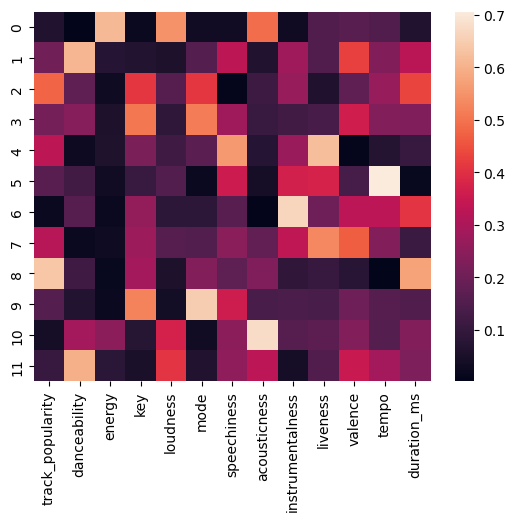

In [59]:
## increasing the variance
#finding pca columns
dataset_pca = pd.DataFrame(abs(pca.components_), columns=scaled_df.columns)
sns.heatmap(dataset_pca)

### Clustering via kMeans

In [113]:
y = songs_df['playlist_genre']
x = scaled_df

clusters =  len(songs_df['playlist_genre'].unique())

kmeans = KMeans(n_clusters = clusters, random_state=42)
kmeans.fit(scaled_df)
y_pred = kmeans.predict(scaled_df)
 
print(kmeans.labels_)

C:\Users\Caitlin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 3 1 ... 0 2 4]


In [114]:
class_df = pd.DataFrame([y_pred, y]).T

In [115]:
class_df.columns = ["labels", "true_labels"]

<Axes: xlabel='labels', ylabel='true_labels'>

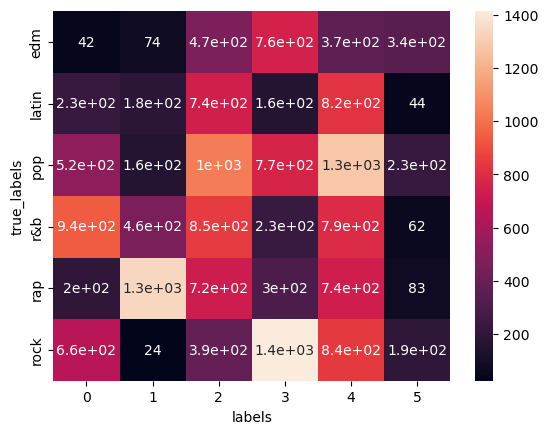

In [126]:
sns.heatmap(class_df.groupby("true_labels").labels.value_counts().unstack().fillna(0), annot=True)

In [127]:
#PCA analysis
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(scaled_df)

In [132]:
pca_2.explained_variance_ratio_

array([0.16721848, 0.12305734])

In [146]:
pca_df = pd.DataFrame(pca_2_result)


clusters =  len(songs_df['playlist_genre'].unique())

kmeans_pca = KMeans(n_clusters = clusters, random_state=42)
kmeans_pca.fit(pca_2_result)

centers = kmeans_pca.cluster_centers_

C:\Users\Caitlin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [155]:
cmap = {
    0:'blue', 
    1:'pink', 
    2:'orange',
    3:'red',
    4:'black',
    5:'purple'
}

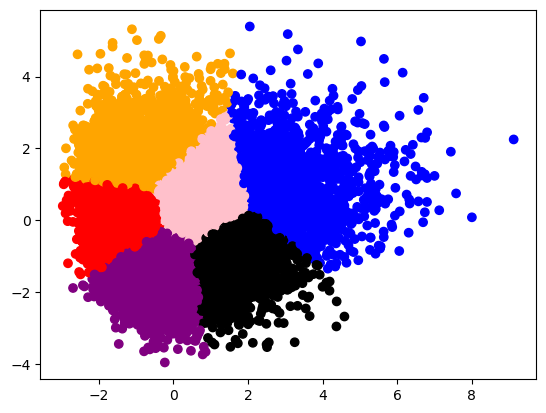

In [156]:
plt.scatter(pca_df[0],pca_df[1], c=[*map(cmap.get, kmeans_pca.labels_)])

model is not too effective, because PCA 2 only accounts for ~28% of the variance

### Visualling appealing, but difficult to determine accuracy... Trying logistic regression

In [177]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [178]:
y = songs_df['playlist_genre']
X = scaled_df

In [179]:
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [180]:
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Mean Accuracy: 0.485 (0.011)


In [181]:
len(n_scores)

30

In [182]:
y = songs_df['playlist_genre']
X = songs_df[numerical_columns]
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [183]:
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Mean Accuracy: 0.194 (0.009)
